# Regresiñon con máquinas de soporte vectorial (SVR)

Las Máquinas de Soporte Vectorial(SVM) sirven tanto para regresiones lineales como no lineales
Las SVR intentan mantener cuántas más observaciones posibles del conjunto de datos dentro del corredor en torno a la recta limitando unos márgenes máximos.
La anchura del pasillo (o la calle) en torno a la recta se controla mediante un hiper parámetro, épsilon.

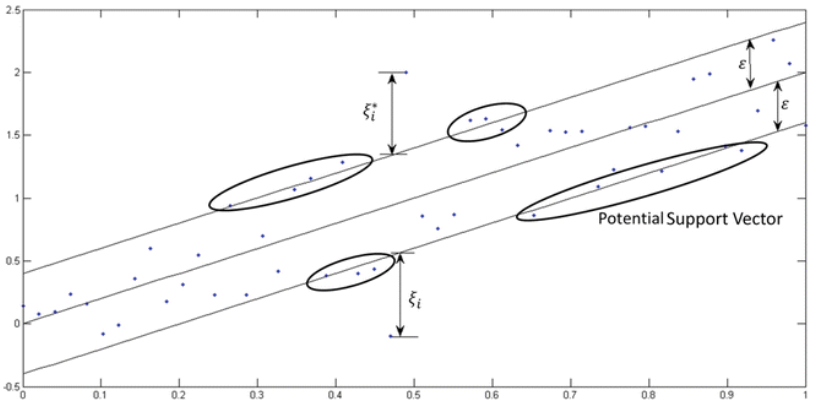


Se necesita que el conjunto de entrenamiento cubra el dominio de interés y vaya acompañado de las soluciones en dicho dominio.
El trabajo de la SVM es aproximar la función que se ha usado para generar los puntos del conjunto de entrenamiento:

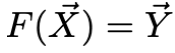


En un problema de clasificación, los vectores X se utilizan para definir un hiperplano que separe las dos categorías en nuestra solución.
Estos vectores se utilizan para llevar a cabo la regresión lineal. Los vectores más cercanos al punto de test se llaman vectores de soporte. Podemos evaluar nuestra función en cualquier lugar, por lo que cualquier vector podría estar más cerca de nuestra ubicación de evaluación de prueba.

## Para construir un modelo de svr necesitamos

1. Tener un conjunto de entrenamiento,
2. Elegir un núcleo y sus parámetros así como llevar a cabo cualquier regularización que sea necesaria
3. Crear la matriz de correlaciones,
4. Entrenar el modelo, de forma exacta o aproximada para obtener los coeficientes de contracción, 
5. Utilizar estos coeficientes para crear un estimador

In [28]:
from google.colab import drive # Montar tu Google drive
from google.colab import drive
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



!git clone https://github.com/alexxsnjr/machine_learning-examples.git
drive.mount('/content/drive')

dataset = pd.read_csv('/content/machine_learning-examples/datasets/Position_Salaries.csv')

print("------dataset-------")
print(dataset)

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

fatal: destination path 'machine_learning-examples' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
------dataset-------
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


# Escalado de variables

Hasta ahora no hemos necesitado hacer el escalado de variables porque las librerías usadas o ya hacían el escalado automático o el modelo no necesitaba el escalado. Pero en este caso, al haber tanta diferencia numérica entre la variable independiente (1,2,3,4,5...) y las variables dependientes (los salarios) necesitaremos usar el escalado.


In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Ajustar la regresión con el dataset

In [30]:
from sklearn.svm import SVR

In [33]:
#probamos con un kernel gaussiano aunque tal vez podríamos usar uno polinómico
regression = SVR(kernel = "rbf")
regression.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicción de nuestros modelos con SVR


In [70]:
y_pred_scalate = regression.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform([y_pred_scalate])
print("El salario para un empleado con 6.5 años de exp será " + str(y_pred[0]) + "$")

El salario para un empleado con 6.5 años de exp será [170370.0204065]$


# Visualización de los resultados del SVR

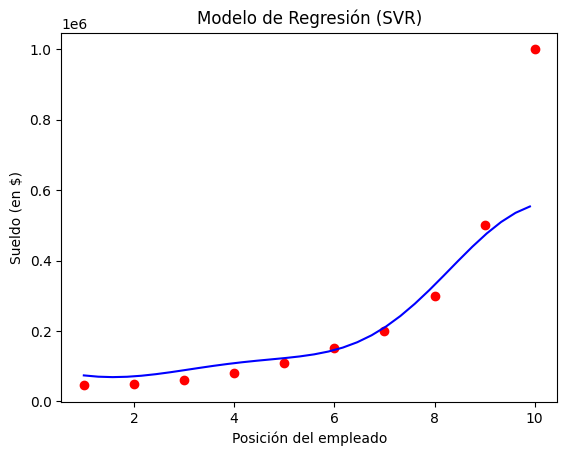

In [90]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

#desescalamos la variables de la predicción
y_pred_scalate_full = regression.predict(X_grid);
y_pred_full = sc_y.inverse_transform([y_pred_scalate_full]).reshape(-1,1)
X_grid_desescalate = sc_X.inverse_transform(X_grid)

#desescalamos los valores originales
X_desescalate = sc_X.inverse_transform(X)
y_desescalate = sc_y.inverse_transform(y).reshape(-1,1)

plt.scatter(X_desescalate, y_desescalate, color = "red")
plt.plot(X_grid_desescalate, y_pred_full, color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()